In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [2]:
relevant_errors = ['',
'-Wanalyzer-use-of-uninitialized-value',
'-Wreturn-type',
'-Wanalyzer-malloc-leak',
'error',
'fatal error',
'warning',
'-Wendif-labels',
'-Wanalyzer-null-dereference',
'-Wnarrowing',
'note',
'-fpermissive',
'-Woverflow',
'-Wunused-result',
'-Wchanges-meaning',
'-Wvexing-parse']

error_indexes = {val: idx for idx, val in enumerate(relevant_errors)}


In [3]:
def counter(filename):
    file = open(filename)
    file_json = json.load(file)
    list_dicts_results = [{'WA': 0, 'CE': 0, 'RTE': 0, 'TLE':0, 'AC': 0} for _ in relevant_errors]
    for envio in file_json:
        try:
            judge_result = file_json[envio]['judge_result']
            
            for error in file_json[envio]['error_list']:
                index = error_indexes[error['error_name']]
                list_dicts_results[index][judge_result] += 1
        except KeyError:
            continue
    return list_dicts_results

In [4]:
list_dicts_results = counter('claseGcc.json')
for i, dic in enumerate(list_dicts_results):
    list_dicts_results[i] = {key:dic[key] for key in dic.keys() if dic[key] > 0}
    

for error, dic in zip(relevant_errors, list_dicts_results):
    print(error, ': ', dic)

 :  {}
-Wanalyzer-use-of-uninitialized-value :  {'WA': 657, 'CE': 23, 'RTE': 213, 'TLE': 157, 'AC': 1244}
-Wreturn-type :  {'WA': 8, 'CE': 11, 'RTE': 9, 'TLE': 12, 'AC': 66}
-Wanalyzer-malloc-leak :  {'WA': 9, 'CE': 7, 'RTE': 1, 'TLE': 17, 'AC': 16}
error :  {'WA': 60, 'CE': 319, 'RTE': 12, 'TLE': 24, 'AC': 149}
fatal error :  {'CE': 60, 'RTE': 1}
-Wendif-labels :  {'WA': 2, 'CE': 3, 'RTE': 4, 'TLE': 2, 'AC': 11}
-Wanalyzer-null-dereference :  {'WA': 7, 'AC': 7}
-Wnarrowing :  {'WA': 1, 'AC': 6}
note :  {'CE': 7}
-fpermissive :  {'CE': 7}
-Woverflow :  {'WA': 1, 'TLE': 1, 'AC': 2}
-Wunused-result :  {'CE': 1, 'RTE': 2, 'AC': 1}
-Wchanges-meaning :  {'CE': 1}
-Wvexing-parse :  {'WA': 1}


In [5]:
list_dict_percentages = []

for i, dic in enumerate(list_dicts_results):
    s = sum(dic.values())
    dic_percentage = {key:str(round((dic[key] * 100.0 / s), 2)) + "%" for key in dic.keys()}
    list_dict_percentages.append(dic_percentage)

for error, dic in zip(relevant_errors, list_dict_percentages):
    print(error, ': ', dic)

 :  {}
-Wanalyzer-use-of-uninitialized-value :  {'WA': '28.64%', 'CE': '1.0%', 'RTE': '9.29%', 'TLE': '6.84%', 'AC': '54.23%'}
-Wreturn-type :  {'WA': '7.55%', 'CE': '10.38%', 'RTE': '8.49%', 'TLE': '11.32%', 'AC': '62.26%'}
-Wanalyzer-malloc-leak :  {'WA': '18.0%', 'CE': '14.0%', 'RTE': '2.0%', 'TLE': '34.0%', 'AC': '32.0%'}
error :  {'WA': '10.64%', 'CE': '56.56%', 'RTE': '2.13%', 'TLE': '4.26%', 'AC': '26.42%'}
fatal error :  {'CE': '98.36%', 'RTE': '1.64%'}
-Wendif-labels :  {'WA': '9.09%', 'CE': '13.64%', 'RTE': '18.18%', 'TLE': '9.09%', 'AC': '50.0%'}
-Wanalyzer-null-dereference :  {'WA': '50.0%', 'AC': '50.0%'}
-Wnarrowing :  {'WA': '14.29%', 'AC': '85.71%'}
note :  {'CE': '100.0%'}
-fpermissive :  {'CE': '100.0%'}
-Woverflow :  {'WA': '25.0%', 'TLE': '25.0%', 'AC': '50.0%'}
-Wunused-result :  {'CE': '25.0%', 'RTE': '50.0%', 'AC': '25.0%'}
-Wchanges-meaning :  {'CE': '100.0%'}
-Wvexing-parse :  {'WA': '100.0%'}


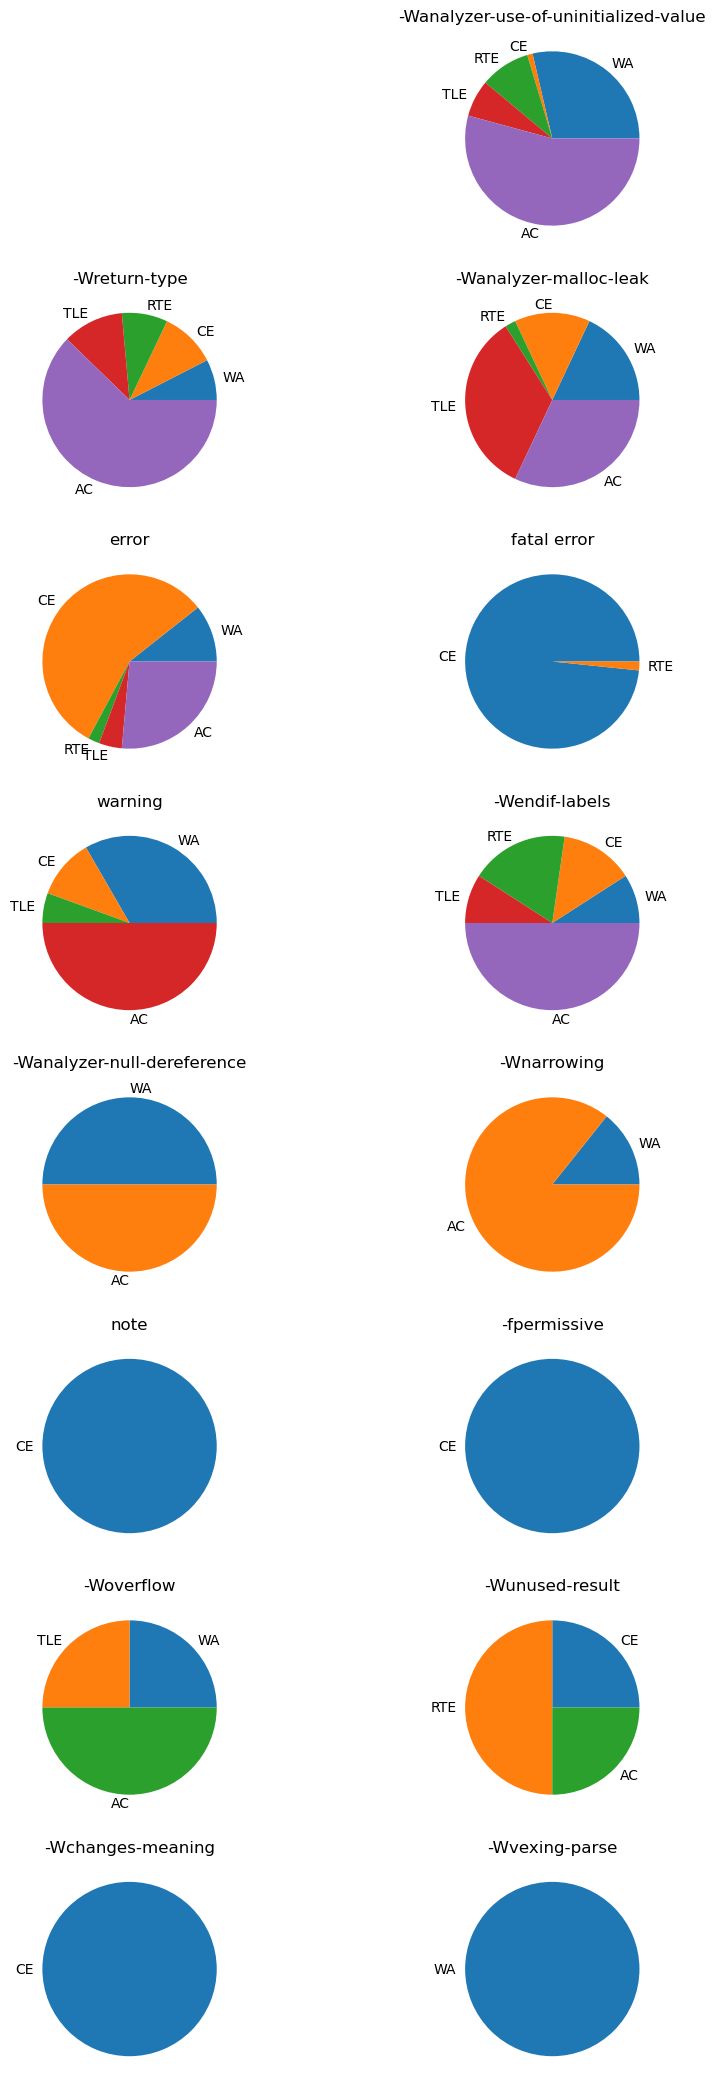

In [6]:
plt.rcParams['figure.figsize'] = [10, 30]
count = 1
for error, dic in zip(relevant_errors, list_dicts_results):
    plt.subplot(len(relevant_errors)//2+1, 2, count)
    plt.pie(dic.values(), labels=dic.keys())
    plt.title(error)
    count += 1

plt.savefig('results_per_error.png')